# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.024148e+01     6.887390e+00
 * time: 0.007562875747680664
     1     2.691914e+01     5.336612e+00
 * time: 0.018321990966796875
     2     1.977068e+01     6.138638e+00
 * time: 0.046011924743652344
     3     1.261142e+01     1.527624e+00
 * time: 0.07957196235656738
     4     1.200302e+01     2.765021e+00
 * time: 0.10177397727966309
     5     1.129388e+01     1.311623e+00
 * time: 0.12368607521057129
     6     1.066798e+01     2.684287e+00
 * time: 0.23228788375854492
     7     1.036597e+01     1.803721e+00
 * time: 0.25356292724609375
     8     9.659654e+00     1.532743e+00
 * time: 0.2816898822784424
     9     9.202010e+00     1.213716e+00
 * time: 0.3064839839935303
    10     9.023855e+00     8.863232e-01
 * time: 0.32672786712646484
    11     8.872235e+00     9.695122e-01
 * time: 0.3478879928588867
    12     8.820468e+00     8.891105e-01
 * time: 0.3639500141143799
    13     8.718407e+00     6.050258e-01
 * time: 

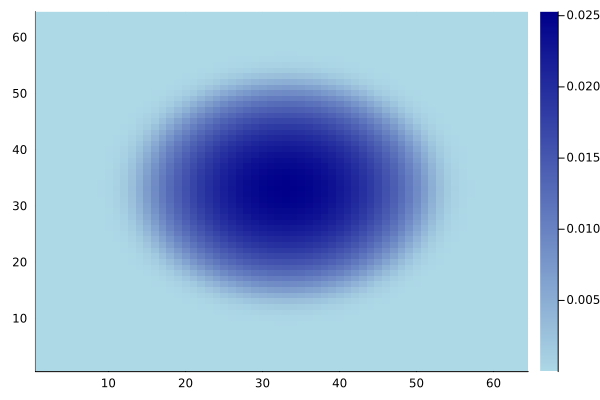

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)